<a href="https://colab.research.google.com/github/Ghyun0726/1/blob/main/Week3_%EA%B3%BC%EC%A0%9C(Code).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
## Lecture 1
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable
import torch.nn.functional as F
print(torch.__version__)

2.4.1+cu121


In [76]:
## Lecture 2
w = 1.0

def forward(x):
    return w * x
def loss(x,y):
    y_pred = forward(x)
    return (y_pred - y) * (y_pred - y)

w= 0.0
	 tensor([1.]) tensor([2.]) tensor([0.]) tensor([4.])
	 tensor([2.]) tensor([4.]) tensor([0.]) tensor([16.])
	 tensor([3.]) tensor([6.]) tensor([0.]) tensor([36.])
MSE= tensor([18.6667])
w= 0.1
	 tensor([1.]) tensor([2.]) tensor([0.1000]) tensor([3.6100])
	 tensor([2.]) tensor([4.]) tensor([0.2000]) tensor([14.4400])
	 tensor([3.]) tensor([6.]) tensor([0.3000]) tensor([32.4900])
MSE= tensor([16.8467])
w= 0.2
	 tensor([1.]) tensor([2.]) tensor([0.2000]) tensor([3.2400])
	 tensor([2.]) tensor([4.]) tensor([0.4000]) tensor([12.9600])
	 tensor([3.]) tensor([6.]) tensor([0.6000]) tensor([29.1600])
MSE= tensor([15.1200])
w= 0.30000000000000004
	 tensor([1.]) tensor([2.]) tensor([0.3000]) tensor([2.8900])
	 tensor([2.]) tensor([4.]) tensor([0.6000]) tensor([11.5600])
	 tensor([3.]) tensor([6.]) tensor([0.9000]) tensor([26.0100])
MSE= tensor([13.4867])
w= 0.4
	 tensor([1.]) tensor([2.]) tensor([0.4000]) tensor([2.5600])
	 tensor([2.]) tensor([4.]) tensor([0.8000]) tensor([10.2400])
	 te

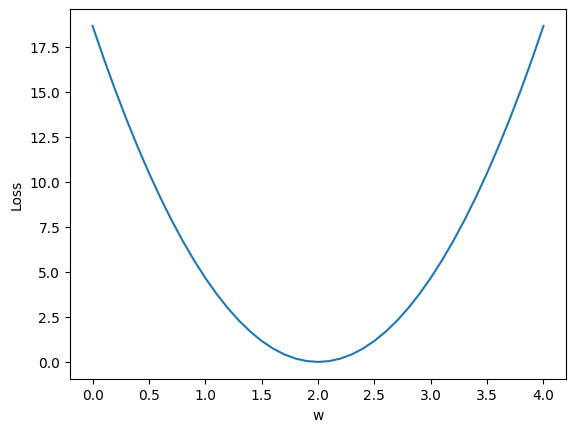

In [77]:
w_list = [ ]
mse_list = [ ]
for w in np.arange(0.0,4.1,0.1):
    print("w=",w)
    l_sum = 0
    for x_val,y_val in zip(x_data,y_data):
        y_pred_val = forward(x_val)
        l = loss(x_val,y_val)
        l_sum += l
        print("\t",x_val,y_val,y_pred_val,l)

    print("MSE=",l_sum/3)
    w_list.append(w)
    mse_list.append(l_sum/3)

plt.plot(w_list,mse_list)
plt.ylabel('Loss')
plt.xlabel('w')
plt.show()

In [78]:
## Lecture 3

x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

w=1.0

def forward(x):
    return x * w

def loss(x,y):
    y_pred = forward(x)
    return (y_pred - y) * (y_pred - y)

def gradient(x,y):
    return 2 * x * (x * w - y)

print("predict (before training)",4,forward(4))

for epoch in range(100):
    for x_val,y_val in zip(x_data,y_data):
        grad = gradient(x_val,y_val)
        w = w - 0.01 * grad
        print("\tgrad:",x_val,y_val,grad)
        l = loss(x_val,y_val)

    print("progress:",epoch,"w=",w,"loss=",l)

print("predict (after training)",4,forward(4))

predict (before training) 4 4.0
	grad: 1.0 2.0 -2.0
	grad: 2.0 4.0 -7.84
	grad: 3.0 6.0 -16.2288
progress: 0 w= 1.260688 loss= 4.919240100095999
	grad: 1.0 2.0 -1.478624
	grad: 2.0 4.0 -5.796206079999999
	grad: 3.0 6.0 -11.998146585599997
progress: 1 w= 1.453417766656 loss= 2.688769240265834
	grad: 1.0 2.0 -1.093164466688
	grad: 2.0 4.0 -4.285204709416961
	grad: 3.0 6.0 -8.87037374849311
progress: 2 w= 1.5959051959019805 loss= 1.4696334962911515
	grad: 1.0 2.0 -0.8081896081960389
	grad: 2.0 4.0 -3.1681032641284723
	grad: 3.0 6.0 -6.557973756745939
progress: 3 w= 1.701247862192685 loss= 0.8032755585999681
	grad: 1.0 2.0 -0.59750427561463
	grad: 2.0 4.0 -2.3422167604093502
	grad: 3.0 6.0 -4.848388694047353
progress: 4 w= 1.7791289594933983 loss= 0.43905614881022015
	grad: 1.0 2.0 -0.44174208101320334
	grad: 2.0 4.0 -1.7316289575717576
	grad: 3.0 6.0 -3.584471942173538
progress: 5 w= 1.836707389300983 loss= 0.2399802903801062
	grad: 1.0 2.0 -0.3265852213980338
	grad: 2.0 4.0 -1.2802140678

In [79]:
##Lecture 4
x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]
w=Variable(torch.Tensor([1.0]),requires_grad=True)
def forward(x):
    return x * w
def loss(x,y):
    y_pred = forward(x)
    return (y_pred - y) * (y_pred - y)
print("predict (before training)",4,forward(4))

for epoch in range(100):
    for x_val,y_val in zip(x_data,y_data):
        l = loss(x_val,y_val)
        l.backward()
        print("\tgrad:",x_val,y_val,w.grad.data[0])
        w.data = w.data - 0.01 * w.grad.data

        w.grad.data.zero_()
    print("progress:", epoch, l.data[0])

print("predict (after training)",4,forward(4).data[0])

predict (before training) 4 tensor([4.], grad_fn=<MulBackward0>)
	grad: 1.0 2.0 tensor(-2.)
	grad: 2.0 4.0 tensor(-7.8400)
	grad: 3.0 6.0 tensor(-16.2288)
progress: 0 tensor(7.3159)
	grad: 1.0 2.0 tensor(-1.4786)
	grad: 2.0 4.0 tensor(-5.7962)
	grad: 3.0 6.0 tensor(-11.9981)
progress: 1 tensor(3.9988)
	grad: 1.0 2.0 tensor(-1.0932)
	grad: 2.0 4.0 tensor(-4.2852)
	grad: 3.0 6.0 tensor(-8.8704)
progress: 2 tensor(2.1857)
	grad: 1.0 2.0 tensor(-0.8082)
	grad: 2.0 4.0 tensor(-3.1681)
	grad: 3.0 6.0 tensor(-6.5580)
progress: 3 tensor(1.1946)
	grad: 1.0 2.0 tensor(-0.5975)
	grad: 2.0 4.0 tensor(-2.3422)
	grad: 3.0 6.0 tensor(-4.8484)
progress: 4 tensor(0.6530)
	grad: 1.0 2.0 tensor(-0.4417)
	grad: 2.0 4.0 tensor(-1.7316)
	grad: 3.0 6.0 tensor(-3.5845)
progress: 5 tensor(0.3569)
	grad: 1.0 2.0 tensor(-0.3266)
	grad: 2.0 4.0 tensor(-1.2802)
	grad: 3.0 6.0 tensor(-2.6500)
progress: 6 tensor(0.1951)
	grad: 1.0 2.0 tensor(-0.2414)
	grad: 2.0 4.0 tensor(-0.9465)
	grad: 3.0 6.0 tensor(-1.9592)
prog

In [80]:
## Lecture 5

x_data = Variable(torch.Tensor([[1.0],[2.0],[3.0]]))
y_data = Variable(torch.Tensor([[2.0],[4.0],[6.0]]))

class Model(torch.nn.Module):
    def __init__(self):
        super(Model,self).__init__()
        self.linear = torch.nn.Linear(1,1)
    def forward(self,x):
        y_pred = self.linear(x)
        return y_pred

model = Model()

criterion = torch.nn.MSELoss(size_average=False)
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)

for epoch in range(500):
    y_pred = model(x_data)

    loss = criterion(y_pred,y_data)
    print(epoch, loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


hour_var = Variable(torch.Tensor([[4.0]]))
print("predict (after training)",4,model(hour_var).data[0][0])

/usr/local/lib/python3.10/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


0 44.822296142578125
1 19.95584487915039
2 8.885971069335938
3 3.957949638366699
4 1.764101266860962
5 0.7874321937561035
6 0.3526168167591095
7 0.15901939570903778
8 0.07280600070953369
9 0.03439724072813988
10 0.017270104959607124
11 0.009617629460990429
12 0.006183152087032795
13 0.004626931622624397
14 0.0039072176441550255
15 0.0035602515563368797
16 0.0033796329516917467
17 0.003273413283750415
18 0.003200726117938757
19 0.003143305890262127
20 0.003093043575063348
21 0.00304632680490613
22 0.003001546021550894
23 0.002957946388050914
24 0.0029152531642466784
25 0.0028732495848089457
26 0.002831940073519945
27 0.0027912163641303778
28 0.002751066815108061
29 0.0027115403208881617
30 0.002672589151188731
31 0.002634152304381132
32 0.0025962996296584606
33 0.002559005282819271
34 0.0025222143158316612
35 0.002485952340066433
36 0.0024502333253622055
37 0.002415040275081992
38 0.002380331512540579
39 0.0023461133241653442
40 0.002312377793714404
41 0.0022791502997279167
42 0.0022464

In [81]:
## Lecture 6



class Model(torch.nn.Module):
    def __init__(self):
        super(Model,self).__init__()
        self.linear = torch.nn.Linear(1,1)
    def forward(self,x):
        y_pred = F.sigmoid(self.linear(x))
        return y_pred

criterion = torch.nn.BCELoss(size_average=True)

/usr/local/lib/python3.10/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


In [83]:
## Lecture 7

class Model(torch.nn.Module):
    def __init__(self):
        super(Model,self).__init__()
        self.l1 = torch.nn.Linear(8,6)
        self.l2 = torch.nn.Linear(6,4)
        self.l3 = torch.nn.Linear(4,1)

        self.sigmoid = torch.nn.Sigmoid()

    def forward(self,x):
        out1 = self.sigmoid(self.l1(x))
        out2 = self.sigmoid(self.l2(out1))